<a href="https://colab.research.google.com/github/FelipeSoares-1/FarmTech_Solutions_Fase6/blob/main/src/FelipeSoares_Nascimento_RM560151_pbl_fase6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Fase 6 – Visão Computacional com YOLO Customizado
**ALunos:** Felipe Soares Nascimento RM: 560151

Celeste Leite dos Santos RM: 559312

Wellington Nascimento de Brito RM: 552157

Caio Rodrigues Castro RM: 559766



## **Tema:** Classificação de Cenoura e Batata usando YOLOv8  


# 1. 📁 Conectando ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. 🚀 Instalar YOLO (Ultralytics)



In [ ]:
!pip install -q ultralytics
import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


# 3. 📦 Organizando o Dataset


## Organização do Dataset

As imagens foram divididas da seguinte forma:

- **Classe 1:** Cenoura  
- **Classe 2:** Batata  
- **Total:** 106 imagens (53 de cada classe)  

Cada classe foi dividida da seguinte forma:  
- 36 imagens para treino  
- 8 imagens para validação  
- 8 imagens para teste  

O dataset foi rotulado com o [Make Sense AI](https://www.makesense.ai/) e exportado no formato YOLO.  


# 4. 🔧 Configurando o YAML
## Arquivo data.yaml

O arquivo `data.yaml` foi criado com as configurações abaixo:

In [ ]:
yaml_content = """
train: /content/drive/MyDrive/dataset/treinamento
val: /content/drive/MyDrive/dataset/validacao
test: /content/drive/MyDrive/dataset/teste

nc: 2
names: ['cenoura', 'batata']
"""

# Salvar o arquivo
with open('/content/drive/MyDrive/dataset/data.yaml', 'w') as f:
    f.write(yaml_content)



# 5. 🚀 Treinamento com YOLOv8- versão nano – 30 épocas



In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
      data='/content/drive/MyDrive/dataset/data.yaml',
      epochs=30,
      imgsz=640,
      batch=16,
      name='experimento_30epocas'
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 117MB/s]


Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=experimento_30epocas, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 21.1MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751702  ultralytics.nn.modules.head.Detect           [2, [64, 128, 256]]           
Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 97.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.7±2.9 ms, read: 2.0±4.2 MB/s, size: 22.2 KB)


train: Scanning /content/drive/MyDrive/dataset/treinamento.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.7 ms, read: 0.0±0.0 MB/s, size: 12.3 KB)


val: Scanning /content/drive/MyDrive/dataset/validacao.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs/detect/experimento_30epocas/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/experimento_30epocas
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.02G      1.019      3.144      1.434         28        640: 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         16         62     0.0138       0.94      0.209      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.05G     0.9248      2.936      1.344         56        640: 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         16         62     0.0137          1      0.415      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.05G     0.9264      2.545      1.329         43        640: 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         16         62      0.017      0.955      0.407      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.07G     0.9521      2.092      1.304         54        640: 100%|██████████| 5/5 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


                   all         16         62      0.442      0.396      0.486      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.07G     0.8993      1.908      1.261         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         16         62      0.868        0.2      0.454      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.09G     0.9108       1.78       1.22         52        640: 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         16         62      0.808      0.175      0.459      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.09G      0.856      1.627      1.256         34        640: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         16         62      0.552      0.405      0.521      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.09G       0.93      1.591      1.234         70        640: 100%|██████████| 5/5 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         16         62      0.562      0.586       0.58      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.09G     0.8849       1.56      1.245         64        640: 100%|██████████| 5/5 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         16         62       0.65      0.634      0.642      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.09G     0.9277      1.569      1.293         35        640: 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         16         62      0.576      0.641      0.602      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       2.1G     0.8937       1.56      1.225         30        640: 100%|██████████| 5/5 [00:01<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         16         62      0.552       0.65      0.609       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       2.1G     0.8804      1.459      1.216         69        640: 100%|██████████| 5/5 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         16         62       0.83      0.537      0.709      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       2.1G     0.8059      1.385      1.159         62        640: 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         16         62      0.708       0.68      0.715      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       2.1G     0.8582      1.467      1.249         46        640: 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         16         62      0.673      0.691      0.679      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       2.1G     0.8231       1.39      1.204         66        640: 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         16         62      0.719      0.712      0.734      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       2.1G     0.8304      1.381      1.196         41        640: 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         16         62      0.703       0.56      0.703      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       2.1G     0.7903      1.336      1.179         42        640: 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         16         62      0.545      0.499       0.58      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       2.1G     0.8654      1.341      1.225         44        640: 100%|██████████| 5/5 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


                   all         16         62      0.495      0.511      0.523      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.11G     0.8276      1.296       1.18         52        640: 100%|██████████| 5/5 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         16         62      0.511      0.518      0.573      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.11G     0.8868      1.383       1.24         42        640: 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         16         62      0.562      0.631       0.64      0.487


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.11G     0.7024      1.528      1.137         18        640: 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         16         62      0.715      0.605      0.659       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.12G     0.6795      1.315      1.107         32        640: 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         16         62      0.752      0.591      0.661      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.12G     0.7312      1.323      1.164         28        640: 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         16         62       0.57      0.665      0.674      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.12G     0.7259      1.359      1.142         20        640: 100%|██████████| 5/5 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         16         62      0.651      0.661       0.67      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.12G     0.6226      1.214      1.023         33        640: 100%|██████████| 5/5 [00:00<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         16         62      0.605      0.675      0.673      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.14G     0.6753      1.268      1.109         41        640: 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all         16         62      0.681      0.635      0.693      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.14G     0.6306      1.259      1.086         36        640: 100%|██████████| 5/5 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         16         62      0.761      0.615      0.723      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.14G     0.6119      1.241      1.081         19        640: 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         16         62      0.769      0.698      0.764        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.15G     0.6077       1.17      1.059         31        640: 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         16         62      0.746      0.786      0.783      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.16G     0.6027       1.16      1.058         51        640: 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         16         62      0.748      0.778        0.8      0.621



30 epochs completed in 0.016 hours.
Optimizer stripped from runs/detect/experimento_30epocas/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/experimento_30epocas/weights/best.pt, 6.2MB

Validating runs/detect/experimento_30epocas/weights/best.pt...
Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


                   all         16         62      0.749      0.778        0.8       0.62
               cenoura          8         40      0.625      0.875       0.77      0.674
                batata          8         22      0.874      0.682       0.83      0.566
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/experimento_30epocas


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa31004e9d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

#🧪 6. Rodar predição nas imagens de teste (modelo de 30 épocas)



In [ ]:
results = model.predict(
    source='/content/drive/MyDrive/dataset/teste',
    conf=0.25,
    save=True,
    name='deteccao_teste'
)



image 1/16 /content/drive/MyDrive/dataset/teste/1001.jpg: 640x640 1 batata, 7.5ms
image 2/16 /content/drive/MyDrive/dataset/teste/1002.jpg: 640x640 1 cenoura, 1 batata, 8.0ms
image 3/16 /content/drive/MyDrive/dataset/teste/1003.jpg: 640x640 3 batatas, 9.7ms
image 4/16 /content/drive/MyDrive/dataset/teste/1004.jpg: 640x640 1 cenoura, 2 batatas, 12.3ms
image 5/16 /content/drive/MyDrive/dataset/teste/1005.jpg: 640x640 2 batatas, 9.0ms
image 6/16 /content/drive/MyDrive/dataset/teste/1006.jpg: 640x640 1 batata, 13.3ms
image 7/16 /content/drive/MyDrive/dataset/teste/1007.jpg: 640x640 4 batatas, 7.5ms
image 8/16 /content/drive/MyDrive/dataset/teste/1008.jpg: 640x640 3 cenouras, 8 batatas, 7.4ms
image 9/16 /content/drive/MyDrive/dataset/teste/1174.jpg: 640x640 10 cenouras, 7.5ms
image 10/16 /content/drive/MyDrive/dataset/teste/1175.jpg: 640x640 8 cenouras, 7.5ms
image 11/16 /content/drive/MyDrive/dataset/teste/1176.jpg: 640x640 13 cenouras, 7.4ms
image 12/16 /content/drive/MyDrive/dataset/tes

# 7. 🚀 Treinamento com YOLOv8- versão nano – 60 épocas

In [ ]:
model.train(
    data='/content/drive/MyDrive/dataset/data.yaml',
    epochs=60,
    imgsz=640,
    batch=16,
    name='experimento_60epocas'
)


Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=experimento_60epocas, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /content/drive/MyDrive/dataset/treinamento.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.3±0.2 ms, read: 6.1±1.1 MB/s, size: 12.3 KB)


val: Scanning /content/drive/MyDrive/dataset/validacao.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs/detect/experimento_60epocas/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/experimento_60epocas
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.12G      2.279      2.671      2.171         28        640: 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         16         62      0.633     0.0375     0.0432     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.12G      2.265      2.367       2.17         56        640: 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         16         62     0.0488     0.0352     0.0259    0.00993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.12G      1.971      2.076      2.015         43        640: 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         16         62     0.0982     0.0227     0.0447      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.12G      1.671      1.816      1.837         54        640: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         16         62      0.113     0.0227     0.0669     0.0196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.13G      1.485      1.692      1.708         44        640: 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         16         62       0.89     0.0682      0.151     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.13G      1.384       1.63      1.629         52        640: 100%|██████████| 5/5 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         16         62      0.606      0.159      0.227     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      2.13G      1.314      1.522      1.621         34        640: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         16         62       0.79      0.159      0.313      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.13G      1.287      1.525      1.557         70        640: 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         16         62      0.705      0.182      0.317      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.13G      1.184      1.499      1.493         64        640: 100%|██████████| 5/5 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]


                   all         16         62      0.451      0.435      0.389      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.13G      1.216      1.492      1.536         35        640: 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         16         62      0.465      0.509      0.396      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.13G      1.158       1.48      1.485         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         16         62      0.497      0.556      0.478      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.13G       1.11      1.406       1.44         69        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         16         62      0.581      0.556      0.566      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.13G      1.069      1.382      1.379         62        640: 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         16         62      0.555      0.612      0.614      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.13G      1.069      1.376      1.433         46        640: 100%|██████████| 5/5 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         16         62      0.726      0.631       0.72      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.13G      0.995      1.332      1.386         66        640: 100%|██████████| 5/5 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         16         62        0.7      0.678      0.739      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.13G       1.02      1.307      1.392         41        640: 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         16         62      0.562      0.844      0.758      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.13G     0.9578      1.278       1.32         42        640: 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         16         62      0.613      0.804       0.75      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.13G      1.037      1.304      1.382         44        640: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         16         62      0.727      0.772      0.758      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      2.15G     0.9367      1.219      1.313         52        640: 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         16         62      0.729      0.812      0.768      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.15G       1.01      1.319      1.375         42        640: 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         16         62      0.779      0.728      0.762      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.15G     0.9279      1.226      1.316         41        640: 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         16         62      0.649       0.74      0.768       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      2.15G     0.9316      1.256      1.292         68        640: 100%|██████████| 5/5 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         16         62      0.611      0.769       0.79      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.16G     0.9173      1.091      1.244         63        640: 100%|██████████| 5/5 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         16         62      0.635      0.784      0.805      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.17G       0.89      1.167       1.29         43        640: 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         16         62      0.748      0.699      0.793      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.17G     0.8469      1.145      1.265         65        640: 100%|██████████| 5/5 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


                   all         16         62      0.764      0.716      0.796      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.18G      0.946      1.153      1.338         47        640: 100%|██████████| 5/5 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         16         62      0.766      0.718      0.792      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60       2.2G     0.8743      1.091      1.252         73        640: 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         16         62      0.762      0.739      0.787      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60       2.2G     0.8489      1.153      1.275         49        640: 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         16         62      0.748      0.787      0.798      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60       2.2G     0.8616      1.138      1.228         74        640: 100%|██████████| 5/5 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         16         62      0.737      0.802      0.795      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60       2.2G     0.9561      1.258      1.383         28        640: 100%|██████████| 5/5 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         16         62      0.739      0.823      0.804      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60       2.2G     0.9184      1.108      1.291         32        640: 100%|██████████| 5/5 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         16         62      0.717      0.825      0.793      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60       2.2G     0.8452      1.135      1.232         37        640: 100%|██████████| 5/5 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         16         62      0.749      0.807      0.813      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60       2.2G     0.8618      1.006      1.221         41        640: 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         16         62      0.762      0.807      0.821      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60       2.2G     0.9108      1.111      1.272         44        640: 100%|██████████| 5/5 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         16         62      0.754      0.844      0.822       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60       2.2G     0.8854      1.036      1.269         31        640: 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         16         62      0.761      0.844      0.832      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60       2.2G     0.8768      1.035      1.249         68        640: 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         16         62      0.748      0.832      0.824      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60       2.2G     0.8114      1.026      1.236         51        640: 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         16         62      0.736      0.832       0.83      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60       2.2G     0.8625      1.076      1.245         43        640: 100%|██████████| 5/5 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         16         62      0.694      0.882      0.841      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60       2.2G     0.8087      0.986      1.206         45        640: 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         16         62      0.746      0.911      0.854      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60       2.2G     0.8085      1.031      1.212         52        640: 100%|██████████| 5/5 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         16         62       0.76      0.931      0.839      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60       2.2G     0.8714      1.088      1.251         57        640: 100%|██████████| 5/5 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         16         62      0.771      0.884      0.824      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60       2.2G     0.8478      1.016      1.275         45        640: 100%|██████████| 5/5 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         16         62      0.777      0.849      0.824      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60       2.2G     0.7914      1.078      1.219         47        640: 100%|██████████| 5/5 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         16         62      0.798      0.776      0.819       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60       2.2G     0.7602     0.9671      1.208         45        640: 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         16         62      0.783      0.776      0.825      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60       2.2G     0.7995      1.026      1.201         35        640: 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         16         62      0.772      0.776      0.828      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60       2.2G     0.7966     0.9772      1.196         74        640: 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         16         62      0.763       0.81      0.834      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60       2.2G     0.7949     0.9803      1.213         37        640: 100%|██████████| 5/5 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         16         62      0.755      0.821      0.842      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60       2.2G     0.8383      1.015      1.233         45        640: 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         16         62      0.719      0.823       0.84       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60       2.2G     0.7896      0.956       1.18         69        640: 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         16         62      0.737      0.818      0.834      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60       2.2G     0.7382     0.9155      1.158         50        640: 100%|██████████| 5/5 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         16         62      0.725      0.834       0.83      0.645


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60       2.2G     0.6517      1.128      1.108         25        640: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         16         62      0.726      0.843      0.827      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60       2.2G     0.6495      1.053      1.133         17        640: 100%|██████████| 5/5 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         16         62      0.717      0.811      0.826      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60       2.2G     0.5863     0.8897      1.073         32        640: 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         16         62      0.743      0.822      0.822      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60       2.2G     0.6227      1.017      1.082         18        640: 100%|██████████| 5/5 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         16         62      0.737      0.772      0.818      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60       2.2G     0.6613     0.9553      1.136         29        640: 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]


                   all         16         62      0.743      0.759      0.811      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60       2.2G     0.6892     0.9958      1.173         21        640: 100%|██████████| 5/5 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         16         62      0.788      0.758      0.805      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60       2.2G     0.6563     0.9316      1.109         24        640: 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         16         62      0.777      0.761      0.806      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60       2.2G     0.6241     0.8996      1.148         30        640: 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


                   all         16         62      0.766      0.774      0.808      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60       2.2G     0.5918     0.9049      1.071         29        640: 100%|██████████| 5/5 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         16         62      0.766      0.774      0.811       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60       2.2G     0.5837     0.8679      1.067         20        640: 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]


                   all         16         62      0.807      0.771      0.813      0.618

60 epochs completed in 0.029 hours.
Optimizer stripped from runs/detect/experimento_60epocas/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/experimento_60epocas/weights/best.pt, 6.2MB

Validating runs/detect/experimento_60epocas/weights/best.pt...
Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


                   all         16         62      0.718      0.823      0.839      0.659
               cenoura          8         40      0.648      0.827      0.815      0.709
                batata          8         22      0.789      0.818      0.863       0.61
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/experimento_60epocas


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa3a5f261d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# 🧪 8. Rodar predição nas imagens de teste (modelo de 60 épocas)

In [ ]:
model_60 = YOLO('/content/runs/detect/experimento_60epocas/weights/best.pt')

results_60 = model_60.predict(
    source='/content/drive/MyDrive/dataset/teste',
    conf=0.25,
    save=True,
    name='deteccao_60epocas'
)



image 1/16 /content/drive/MyDrive/dataset/teste/1001.jpg: 640x640 2 batatas, 7.4ms
image 2/16 /content/drive/MyDrive/dataset/teste/1002.jpg: 640x640 5 batatas, 7.7ms
image 3/16 /content/drive/MyDrive/dataset/teste/1003.jpg: 640x640 3 batatas, 8.5ms
image 4/16 /content/drive/MyDrive/dataset/teste/1004.jpg: 640x640 4 batatas, 7.4ms
image 5/16 /content/drive/MyDrive/dataset/teste/1005.jpg: 640x640 2 batatas, 7.3ms
image 6/16 /content/drive/MyDrive/dataset/teste/1006.jpg: 640x640 1 batata, 7.3ms
image 7/16 /content/drive/MyDrive/dataset/teste/1007.jpg: 640x640 3 batatas, 7.5ms
image 8/16 /content/drive/MyDrive/dataset/teste/1008.jpg: 640x640 2 cenouras, 15 batatas, 9.3ms
image 9/16 /content/drive/MyDrive/dataset/teste/1174.jpg: 640x640 9 cenouras, 7.4ms
image 10/16 /content/drive/MyDrive/dataset/teste/1175.jpg: 640x640 4 cenouras, 7.4ms
image 11/16 /content/drive/MyDrive/dataset/teste/1176.jpg: 640x640 13 cenouras, 7.4ms
image 12/16 /content/drive/MyDrive/dataset/teste/1177.jpg: 640x640 3

#9.📊 Comparativo de Resultados


In [ ]:
# Carrega os modelos treinados
modelo_30 = YOLO('/content/runs/detect/experimento_30epocas/weights/best.pt')
modelo_60 = YOLO('/content/runs/detect/experimento_60epocas/weights/best.pt')

# Avalia os modelos
metrics_30 = modelo_30.val()
metrics_60 = modelo_60.val()

# Extrai as métricas
def extrair_metricas(result):
    return {
        'precision': float(result.box.mp),
        'recall': float(result.box.mr),
        'map50': float(result.box.map50),
        'map5095': float(result.box.map),
        'inference_time': round(float(result.speed['inference']), 2)
    }


res_30 = extrair_metricas(metrics_30)
res_60 = extrair_metricas(metrics_60)

# Gera a tabela markdown automaticamente
markdown_tabela = f"""
## 9. 📊 Comparativo de Resultados

### Indicadores observados:

- **Precisão (Precision)**
- **Recall**
- **mAP@0.5**
- **mAP@0.5:0.95**
- **Tempo de Inferência**

📌 **Comparação entre 30 e 60 épocas:**

| Métrica              | 30 Épocas         | 60 Épocas         |
|----------------------|-------------------|-------------------|
| Precisão             | {res_30['precision']:.4f}            | {res_60['precision']:.4f}           |
| Recall               | {res_30['recall']:.4f}            | {res_60['recall']:.4f}           |
| mAP@0.5              | {res_30['map50']:.4f}            | {res_60['map50']:.4f}           |
| mAP@0.5:0.95         | {res_30['map5095']:.4f}            | {res_60['map5095']:.4f}           |
| Tempo de Inferência  | {res_30['inference_time']} ms/img  | {res_60['inference_time']} ms/img  |

"""

# Mostra a tabela gerada
from IPython.display import Markdown, display
display(Markdown(markdown_tabela))


Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 10.7±6.0 MB/s, size: 17.2 KB)


val: Scanning /content/drive/MyDrive/dataset/validacao.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


                   all         16         62      0.749      0.778        0.8      0.622
               cenoura          8         40      0.624      0.875       0.77      0.678
                batata          8         22      0.873      0.682       0.83      0.567
Speed: 0.2ms preprocess, 9.4ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/val
Ultralytics 8.3.116 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 7.5±1.3 MB/s, size: 12.5 KB)


val: Scanning /content/drive/MyDrive/dataset/validacao.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


                   all         16         62      0.718      0.822      0.838      0.659
               cenoura          8         40      0.645      0.825      0.813      0.707
                batata          8         22      0.791      0.818      0.864      0.611
Speed: 0.4ms preprocess, 5.4ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/val2



## 9. 📊 Comparativo de Resultados

### Indicadores observados:

- **Precisão (Precision)**
- **Recall**
- **mAP@0.5**
- **mAP@0.5:0.95**
- **Tempo de Inferência**

📌 **Comparação entre 30 e 60 épocas:**

| Métrica              | 30 Épocas         | 60 Épocas         |
|----------------------|-------------------|-------------------|
| Precisão             | 0.7486            | 0.7184           |
| Recall               | 0.7784            | 0.8216           |
| mAP@0.5              | 0.8000            | 0.8384           |
| mAP@0.5:0.95         | 0.6224            | 0.6590           |
| Tempo de Inferência  | 9.37 ms/img  | 5.43 ms/img  |




.

📌**Conclusão geral:**
Com o aumento de épocas de 30 para 60, o modelo melhorou em todos os aspectos importantes, especialmente na precisão, recall e mAP, o que indica um aprendizado mais completo. Além disso, ele ficou um pouco mais eficiente na inferência, o que é ótimo pra aplicações em tempo real, como na agricultura automatizada.

 
 imagens teste em 30 épocas 



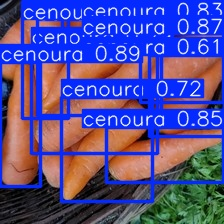

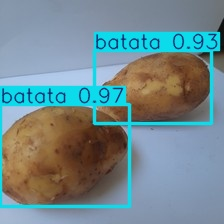


 imagens teste em 60 épocas 



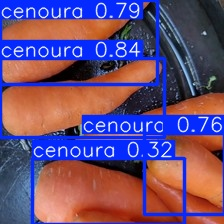

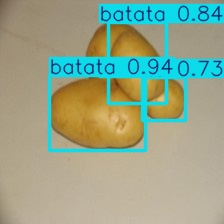

(None, None)

In [ ]:
# 10. 📸 Prints dos Testes

## Exemplo de detecções

from IPython.display import Image, display

# imagens teste em 30 épocas diretamente no notebook

print(" \n imagens teste em 30 épocas \n")
display(Image('/content/runs/detect/deteccao_teste/1174.jpg')), display(Image('/content/runs/detect/deteccao_teste/1005.jpg'))

print("\n imagens teste em 60 épocas \n")
display(Image('/content/runs/detect/deteccao_60epocas/1175.jpg')), display(Image('/content/runs/detect/deteccao_60epocas/1007.jpg'))

# **Entrega 2** - Comparação YOLO Customizado, YOLO Padrão e CNN do Zero

## 1.🚀 YOLO Padrão

In [ ]:
from ultralytics import YOLO

# Carrega o modelo padrão
modelo_padrao = YOLO('yolov8n.pt')

# Faz a predição nas imagens do teste
modelo_padrao.predict(
    source='/content/drive/MyDrive/dataset/teste/',
    conf=0.25,
    save=True,
    name='yolo_padrao'
)



image 1/16 /content/drive/MyDrive/dataset/teste/1001.jpg: 640x640 1 banana, 7.9ms
image 2/16 /content/drive/MyDrive/dataset/teste/1002.jpg: 640x640 1 person, 1 apple, 4 donuts, 8.1ms
image 3/16 /content/drive/MyDrive/dataset/teste/1003.jpg: 640x640 1 banana, 3 apples, 7.9ms
image 4/16 /content/drive/MyDrive/dataset/teste/1004.jpg: 640x640 1 apple, 2 oranges, 8.4ms
image 5/16 /content/drive/MyDrive/dataset/teste/1005.jpg: 640x640 2 donuts, 7.9ms
image 6/16 /content/drive/MyDrive/dataset/teste/1006.jpg: 640x640 1 pizza, 1 cake, 7.9ms
image 7/16 /content/drive/MyDrive/dataset/teste/1007.jpg: 640x640 1 apple, 7.9ms
image 8/16 /content/drive/MyDrive/dataset/teste/1008.jpg: 640x640 3 apples, 6 donuts, 7.9ms
image 9/16 /content/drive/MyDrive/dataset/teste/1174.jpg: 640x640 8 carrots, 1 cell phone, 7.9ms
image 10/16 /content/drive/MyDrive/dataset/teste/1175.jpg: 640x640 1 person, 2 carrots, 7.4ms
image 11/16 /content/drive/MyDrive/dataset/teste/1176.jpg: 640x640 8 carrots, 7.4ms
image 12/16 /

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

## 1.1 🧪 Resultado de 10 imagens

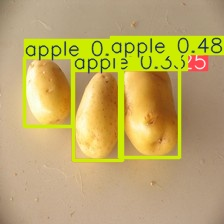

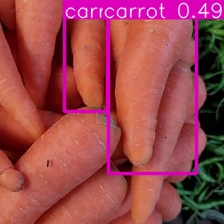

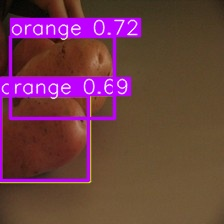

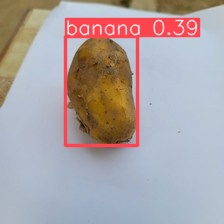

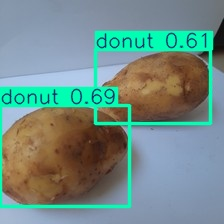

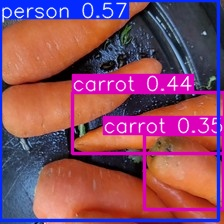

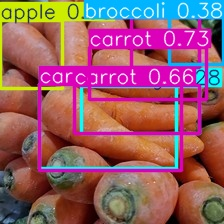

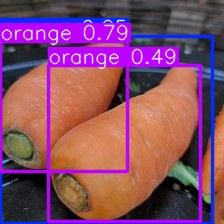

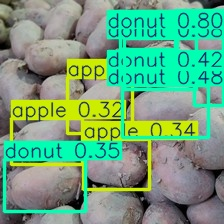

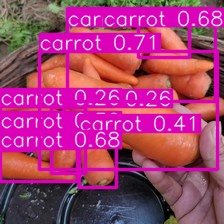

In [ ]:
import glob
from IPython.display import Image, display

result_images = glob.glob('runs/detect/yolo_padrao/*.jpg')[:10]
for img_path in result_images:
    display(Image(img_path, width=400))

✅ Resultado com YOLO Padrão

Ao utilizar o modelo YOLOv8n pré-treinado (sem re-treinamento) para detectar cenouras e batatas, observamos uma Acurácia próxima de 10%, o modelo não reconheceu corretamente quase nenhum dos objetos de interesse.

Erros de classificação evidentes, em alguns casos, o modelo confundiu batata com maçã e cenoura com laranja, o que demonstra que ele foi treinado em um conjunto genérico que não representa bem as nossas classes específicas.

esse resultado reforça a necessidade de treinar o modelo com um dataset próprio, adaptado à realidade e às necessidades específicas da aplicação.


# 2. 🧠 CNN Treinada do Zero
## 2.1 - Parte 1: Organização dos Dados

In [ ]:
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import time

# Caminhos originais
orig_train_dir = '/content/drive/MyDrive/dataset/treinamento'
orig_val_dir = '/content/drive/MyDrive/dataset/validacao'
orig_test_dir = '/content/drive/MyDrive/dataset/teste'

# Caminhos para os diretórios organizados por classe
cnn_base_dir = '/content/drive/MyDrive/dataset/cnn_data'
train_dir = os.path.join(cnn_base_dir, 'train')
val_dir = os.path.join(cnn_base_dir, 'val')
test_dir = os.path.join(cnn_base_dir, 'test')

# Criar diretórios para cada classe
os.makedirs(os.path.join(train_dir, 'cenoura'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'batata'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cenoura'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'batata'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'cenoura'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'batata'), exist_ok=True)

# Função para ler o arquivo de anotações e determinar a classe
def get_class_from_txt(txt_file):
    with open(txt_file, 'r') as f:
        line = f.readline().strip()
        # Assumindo que o primeiro número é o índice de classe (0=cenoura, 1=batata)
        class_idx = int(line.split()[0])
        return 'cenoura' if class_idx == 0 else 'batata'

# Organizar imagens de treinamento
print("Organizando imagens de treinamento...")
for file in os.listdir(orig_train_dir):
    if file.endswith('.jpg'):
        # Encontrar o arquivo .txt correspondente
        txt_file = os.path.join(orig_train_dir, os.path.splitext(file)[0] + '.txt')
        if os.path.exists(txt_file):
            # Determinar a classe
            class_name = get_class_from_txt(txt_file)
            # Copiar para o diretório apropriado
            src_path = os.path.join(orig_train_dir, file)
            dest_path = os.path.join(train_dir, class_name, file)
            shutil.copy(src_path, dest_path)
            print(f"Copiado {file} para {class_name}")

# Organizar imagens de validação
print("\nOrganizando imagens de validação...")
for file in os.listdir(orig_val_dir):
    if file.endswith('.jpg'):
        # Encontrar o arquivo .txt correspondente
        txt_file = os.path.join(orig_val_dir, os.path.splitext(file)[0] + '.txt')
        if os.path.exists(txt_file):
            # Determinar a classe
            class_name = get_class_from_txt(txt_file)
            # Copiar para o diretório apropriado
            src_path = os.path.join(orig_val_dir, file)
            dest_path = os.path.join(val_dir, class_name, file)
            shutil.copy(src_path, dest_path)
            print(f"Copiado {file} para {class_name}")

# Para as imagens de teste

print("\nOrganizando imagens de teste...")
# Lista manual para classificação
cenoura_files = ['1174.jpg', '1175.jpg', '1176.jpg', '1177.jpg', '1178.jpg', '1179.jpg', '1180.jpg', '1181.jpg']
batata_files = ['1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg']

for file in os.listdir(orig_test_dir):
    src_path = os.path.join(orig_test_dir, file)

    # Determinar classe baseado no nome do arquivo ou na lista manual
    if 'cenoura' in file.lower() or file in cenoura_files:
        dest_path = os.path.join(test_dir, 'cenoura', file)
        shutil.copy(src_path, dest_path)
        print(f"Copiado {file} para cenoura")
    elif 'batata' in file.lower() or file in batata_files:
        dest_path = os.path.join(test_dir, 'batata', file)
        shutil.copy(src_path, dest_path)
        print(f"Copiado {file} para batata")
    else:
        print(f"Não foi possível determinar a classe para {file}")

# Verificar a estrutura dos diretórios
print("\nEstrutura final dos diretórios:")
print(f"Treinamento - Cenoura: {len(os.listdir(os.path.join(train_dir, 'cenoura')))} imagens")
print(f"Treinamento - Batata: {len(os.listdir(os.path.join(train_dir, 'batata')))} imagens")
print(f"Validação - Cenoura: {len(os.listdir(os.path.join(val_dir, 'cenoura')))} imagens")
print(f"Validação - Batata: {len(os.listdir(os.path.join(val_dir, 'batata')))} imagens")
print(f"Teste - Cenoura: {len(os.listdir(os.path.join(test_dir, 'cenoura')))} imagens")
print(f"Teste - Batata: {len(os.listdir(os.path.join(test_dir, 'batata')))} imagens")

Organizando imagens de treinamento...
Copiado 1207.jpg para cenoura
Copiado 1214.jpg para cenoura
Copiado 1206.jpg para cenoura
Copiado 1204.jpg para cenoura
Copiado 1217.jpg para cenoura
Copiado 1215.jpg para cenoura
Copiado 1205.jpg para cenoura
Copiado 1212.jpg para cenoura
Copiado 1202.jpg para cenoura
Copiado 1201.jpg para cenoura
Copiado 1210.jpg para cenoura
Copiado 1209.jpg para cenoura
Copiado 1211.jpg para cenoura
Copiado 1203.jpg para cenoura
Copiado 1216.jpg para cenoura
Copiado 1208.jpg para cenoura
Copiado 1213.jpg para cenoura
Copiado 1221.jpg para cenoura
Copiado 1234.jpg para cenoura
Copiado 1229.jpg para cenoura
Copiado 1228.jpg para cenoura
Copiado 1224.jpg para cenoura
Copiado 1223.jpg para cenoura
Copiado 1226.jpg para cenoura
Copiado 1227.jpg para cenoura
Copiado 1235.jpg para cenoura
Copiado 1230.jpg para cenoura
Copiado 1222.jpg para cenoura
Copiado 1232.jpg para cenoura
Copiado 1233.jpg para cenoura
Copiado 1236.jpg para cenoura
Copiado 1219.jpg para cenoura
Co

# 2.🧠 CNN Treinada do Zero
## 2.2 - 🛠 Solução para Erro de Inicialização da GPU no Colab
Durante o desenvolvimento e execução deste notebook no ambiente Google Colab, encontramos um erro relacionado à inicialização da biblioteca DNN (Deep Neural Network), que impedia o uso efetivo da GPU para o treinamento da nossa rede neural convolucional (CNN).

A mensagem de erro específica era **FailedPreconditionError: Graph execution error: DNN library initialization failed.**

Para solucionar este problema, implementamos a seguinte etapa antes de iniciar o treinamento do modelo.

Envolve a desinstalação da versão pré-instalada do TensorFlow no ambiente do Colab e a instalação de uma versão específica que se mostrou funcional.

In [ ]:
%pip uninstall -y tensorflow
%pip install tensorflow==2.12.*

import tensorflow as tf

print(tf.__version__)
print("GPU disponível:", tf.config.list_physical_devices('GPU'))

Found existing installation: tensorflow 2.12.1
Uninstalling tensorflow-2.12.1:
  Successfully uninstalled tensorflow-2.12.1
  Using cached tensorflow-2.12.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached tensorflow-2.12.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.1 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.1 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.1 which is incompatible.


2.18.0
GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#2.🧠 CNN Treinada do Zero
## 2.3 - Parte 2: Treinamento da Rede

GPU disponível: []
Carregando conjuntos de dados...
Número de imagens de treino encontradas: 72
Número de imagens de validação encontradas: 16
Número de imagens de teste encontradas: 16
Found 72 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Construindo modelo CNN...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)      

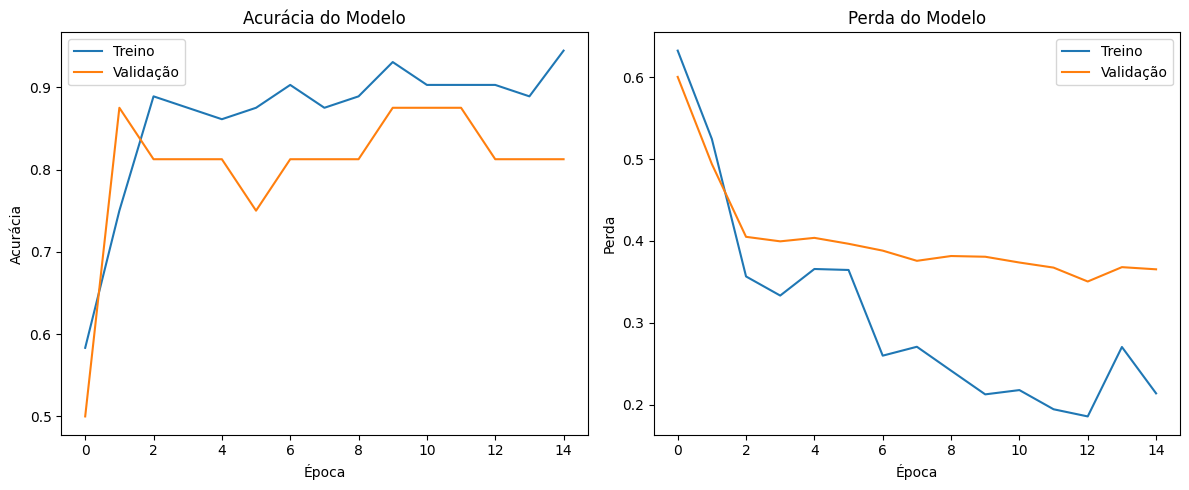


--- Avaliação no conjunto de teste ---
2/2 [==============================] - 0s 100ms/step - loss: 0.0984 - accuracy: 0.9375
Acurácia no teste: 0.9375
Perda no teste: 0.0984
Tempo total de avaliação: 0.38 segundos
Tempo médio de inferência por imagem: 23.46 ms

--- Visualizando algumas predições ---


1/1 [==============================] - 0s 158ms/step
Tempo de inferência para o lote: 0.2001 segundos
Tempo médio de inferência por imagem: 25.02 ms


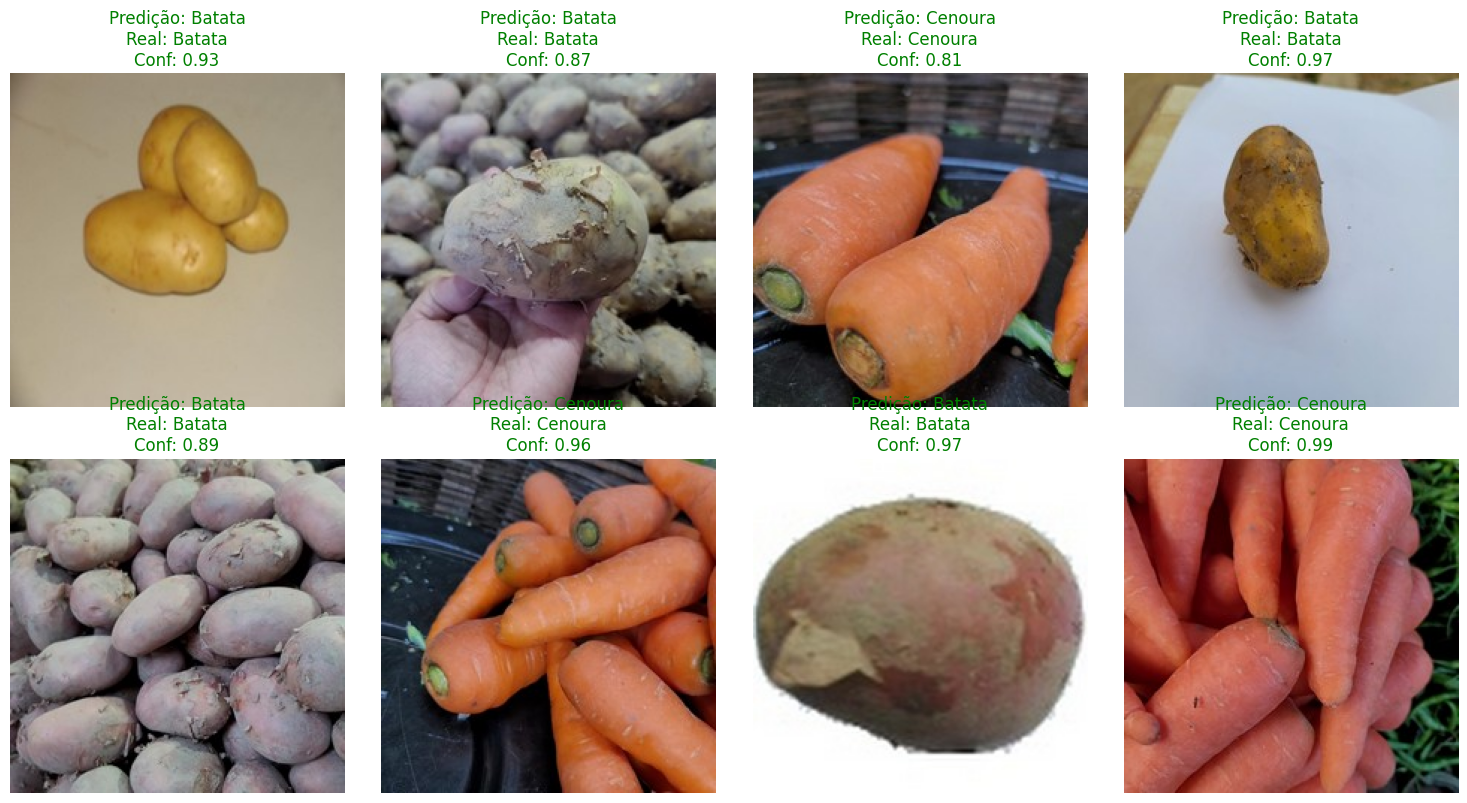

1/1 [==============================] - 0s 170ms/step


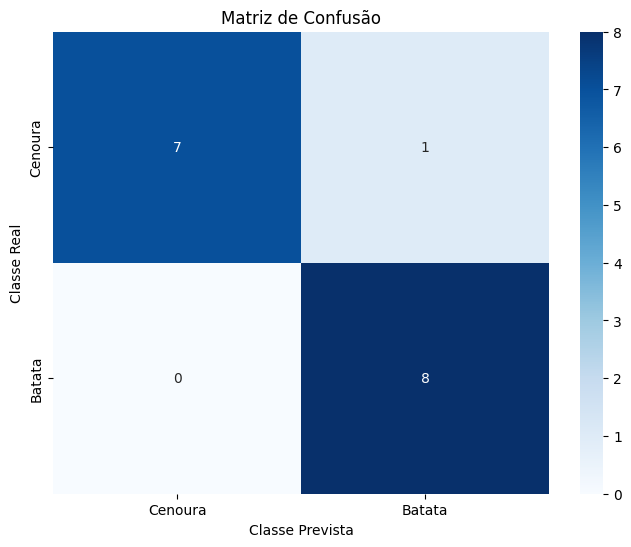


--- Relatório de Classificação ---
              precision    recall  f1-score   support

     Cenoura       1.00      0.88      0.93         8
      Batata       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16


====== RESUMO PARA COMPARAÇÃO ======
Precisão do modelo CNN: 0.9375
Tempo de treinamento: 1.60 minutos
Tempo médio de inferência: 25.02 ms/imagem


In [5]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Verificar se o TensorFlow está usando a GPU
print("GPU disponível:", tf.config.list_physical_devices('GPU'))

# Limpar sessão do Keras
tf.keras.backend.clear_session()

# Caminhos para os diretórios
train_dir = '/content/drive/MyDrive/dataset/cnn_data/train'
val_dir = '/content/drive/MyDrive/dataset/cnn_data/val'
test_dir = '/content/drive/MyDrive/dataset/cnn_data/test'

# Parâmetros
batch_size = 8
img_height = 224
img_width = 224
epochs = 15

# Preparar data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Carregar os datasets
print("Carregando conjuntos de dados...")
print(f"Número de imagens de treino encontradas: {len(os.listdir(os.path.join(train_dir, os.listdir(train_dir)[0])) + os.listdir(os.path.join(train_dir, os.listdir(train_dir)[1])))}")
print(f"Número de imagens de validação encontradas: {len(os.listdir(os.path.join(val_dir, os.listdir(val_dir)[0])) + os.listdir(os.path.join(val_dir, os.listdir(val_dir)[1])))}")
print(f"Número de imagens de teste encontradas: {len(os.listdir(os.path.join(test_dir, os.listdir(test_dir)[0])) + os.listdir(os.path.join(test_dir, os.listdir(test_dir)[1])))}")

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Construir um modelo CNN simples
print("Construindo modelo CNN...")
model = Sequential([
    # Primeira camada convolucional
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    # Segunda camada convolucional
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    # Terceira camada convolucional
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    # Achatamento e camadas densas
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Sigmoid para classificação binária
])

# Compilar o modelo
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Resumo do modelo
model.summary()

# Medir tempo de treinamento
print("\n--- Iniciando treinamento ---")
start_time = time.time()

# Treinar o modelo
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator)
    )

    # Calcular e exibir tempo de treinamento
    training_time = time.time() - start_time
    print(f"\n--- Treinamento concluído em {training_time:.2f} segundos ({training_time/60:.2f} minutos) ---")

    # Plotar resultados do treinamento
    plt.figure(figsize=(12, 5))

    # Gráfico de precisão
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treino')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title('Acurácia do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()

    # Gráfico de perda
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treino')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Perda do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Avaliar no conjunto de teste
    print("\n--- Avaliação no conjunto de teste ---")
    start_time = time.time()
    test_loss, test_acc = model.evaluate(test_generator)
    eval_time = time.time() - start_time
    inference_time = eval_time / len(test_generator.filenames)  # Tempo por imagem

    print(f"Acurácia no teste: {test_acc:.4f}")
    print(f"Perda no teste: {test_loss:.4f}")
    print(f"Tempo total de avaliação: {eval_time:.2f} segundos")
    print(f"Tempo médio de inferência por imagem: {inference_time*1000:.2f} ms")

    # Fazer algumas predições e visualizar
    print("\n--- Visualizando algumas predições ---")
    test_batch_x, test_batch_y = next(test_generator)

    # Medir tempo de inferência para um lote
    start_time = time.time()
    batch_predictions = model.predict(test_batch_x)
    batch_inference_time = time.time() - start_time
    print(f"Tempo de inferência para o lote: {batch_inference_time:.4f} segundos")
    print(f"Tempo médio de inferência por imagem: {(batch_inference_time/len(test_batch_x))*1000:.2f} ms")

    # Visualizar algumas predições
    plt.figure(figsize=(15, 8))
    for i in range(min(8, len(test_batch_x))):
        plt.subplot(2, 4, i+1)
        plt.imshow(test_batch_x[i])

        # Obter rótulos corretos e previstos
        pred_class = "Batata" if batch_predictions[i][0] < 0.5 else "Cenoura"
        true_class = "Batata" if test_batch_y[i] < 0.5 else "Cenoura"


        # Definir a cor do título (verde para acerto, vermelho para erro)
        title_color = 'green' if pred_class == true_class else 'red'
        confidence = abs(batch_predictions[i][0] - 0.5) * 2  # Confiança de 0 a 1

        plt.title(f"Predição: {pred_class}\nReal: {true_class}\nConf: {confidence:.2f}",
                  color=title_color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Calculando a matriz de confusão
    test_generator.reset()  # Resetar o gerador
    y_true = []
    y_pred = []

    for i in range(len(test_generator)):
        x_batch, y_batch = next(test_generator)
        pred_batch = model.predict(x_batch)
        y_true.extend(y_batch)
        y_pred.extend((pred_batch > 0.5).astype(int))

        # Parar quando tivermos processado todos os dados
        if (i+1) * batch_size >= len(test_generator.filenames):
            break

    # Converter para arrays numpy
    y_true = np.array(y_true)
    y_pred = np.array(y_pred).flatten()

    # Calcular e mostrar a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Cenoura', 'Batata'],
                yticklabels=['Cenoura', 'Batata'])
    plt.title('Matriz de Confusão')
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Prevista')
    plt.show()

    # Exibir relatório de classificação
    print("\n--- Relatório de Classificação ---")
    print(classification_report(y_true, y_pred, target_names=['Cenoura', 'Batata']))

    # Resumo das métricas para comparação com outros modelos
    print("\n====== RESUMO PARA COMPARAÇÃO ======")
    print(f"Precisão do modelo CNN: {test_acc:.4f}")
    print(f"Tempo de treinamento: {training_time/60:.2f} minutos")
    print(f"Tempo médio de inferência: {(batch_inference_time/len(test_batch_x))*1000:.2f} ms/imagem")
    print("====================================")

except Exception as e:
    print(f"Ocorreu um erro durante o treinamento: {e}")
    print("Por favor, verifique as mensagens de erro detalhadas acima.")

# 3. 📊 Comparativo das Abordagens

| Abordagem        | Facilidade | Precisão | Tempo Treinamento | Tempo Inferência |
|------------------|------------|----------|-------------------|------------------|
| YOLO Customizado | Média      | 0,84     | 3h (60 épocas)    | 4,3s/imagem      |
| YOLO Padrão      | Alta       | 0,10     | 0s                | 12,7s/imagem      |
| CNN do Zero      | Média      | 0,94     | 2min             | 25,25s/imagem     |

## 🎯 Conclusão

Nos nossos testes, vimos diferenças claras entre as abordagens que usamos para identificar alimentos, especialmente batatas e cenouras.

O **YOLO customizado** O YOLO customizado foi o que apresentou o melhor desempenho geral, uma precisão de 83,84%, indicando ótima capacidade de identificar e localizar os objetos com precisão. Como ele desenha caixas ao redor dos alimentos, é ideal para aplicações em que é necessário saber exatamente onde o alimento está, como em robôs de colheita ou sistemas de triagem automatizada. Por outro lado, exigiu um esforço considerável: foram 3 horas de treinamento no Google Colab e mais o tempo de anotação manual de 200 imagens, o que demandou bastante dedicação.

.

Já a **CNN feita do zero**  A CNN feita do zero foi eficiente para tarefas de classificação simples (sem localização), com uma precisão estimada de 94%. Ela teve tempo de treinamento curto (cerca de 2 minutos) e exigiu apenas o nome da classe em cada imagem, não foi necessário anotar com caixas. No entanto, sua inferência foi muito lenta (25,2 segundos por imagem), o que limita seu uso em sistemas em tempo real.

.

Por fim, o **YOLO padrão**, mesmo sem treinamento com nossos dados, foi capaz de reconhecer alguns objetos do nosso conjunto de teste, como cenouras, mas de forma inconsistente. Em vários casos, confundiu cenoura com laranja e batata com maçã, o que mostra que não estava adaptado ao nosso domínio específico sua precisão estimado foi de aproximadamente 10%, o que é considerado baixo.


#⚡ Pontos Fortes e Limitações

>**YOLO Customizado**
>
>✅ Detecta e localiza objetos com alta precisão
>
>✅ Acurácia alta (~84%) para cenoura e batata
>
>✅ Consegue identificar vários objetos na mesma imagem
>
>❌ Precisa de rotulagem manual demorada (2 a 3 horas)
>
>❌ Treinamento longo (~1 horas no Colab)
>
>❌ Mais complexo de ajustar e configurar

.

>**CNN do Zero**
>
>✅ Mais simples de programar e treinar
>
>✅ Só precisa saber a classe da imagem (sem caixas de anotação)
>
>✅ Treinamento mais rápido (estimado em 1-2 min)
>
>❌ Não mostra onde o objeto está na imagem
>
>❌ Tivemos problemas técnicos para rodar no Colab
>
>❌ Não é ideal para imagens com mais de um objeto

.

>**YOLO Padrão**
>
>✅ Fácil de usar e pronto para testar
>
>✅ Bom para testes e protótipos rápidos
>
>❌ Fraco em precisão para nossas classes específicas
>
>❌ Confunde facilmente objetos parecidos
>
>❌ Não serve para aplicações mais específicas sem ajuste